In [2]:
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import cm
import math
import time
import os

import bayesian_lib
import preprocessing_lib

import importlib
importlib.reload(bayesian_lib)
importlib.reload(preprocessing_lib)

%matplotlib inline

## YCrCb model

In [20]:
annotation_file_path = '../dataset/annotation/annotation_test3.json'
raw_image_folder = '../dataset/raw/'
name_features = ['Y channel', 'Cr channel', 'Cb channel']

BS_model_ycrcb = bayesian_lib.Bayesian(name_features=name_features)
BS_model_ycrcb.fit(raw_image_folder, annotation_file_path, RoI=[200, 200, 115, 115], mode='YCrCb')

(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
Complete Fit data -------------
Detail
------------------------------------------------
Mode: YCrCb
Number of Feature: 3 -> ['Y channel', 'Cr channel', 'Cb channel']
------------------------------------------------
Probability of Cocoa:		0.25078506097560976
Probability of Back ground:	0.7492149390243903
------------------------------------------------
Number of cocao sample:		65815
Number of background sample:	196585
Number of shadow sample:	29162
Number of fit sample:		65815
------------------------------------------------
Model Background
	Y channel 	mean: 0.9277148513435611 	std: 0.10242379920698272
	Cr channel 	mean: 0.5018922022960972 	std: 0.0049024596817216215
	Cb channel 	mean: 0.5078930394614732 	std: 0.008850402977346374
------------------------------------------------
Model Cocoa
	Y channel 	mean: 0.438038887970291 	std: 0.11815584633571974
	Cr channel 	mean: 0.566

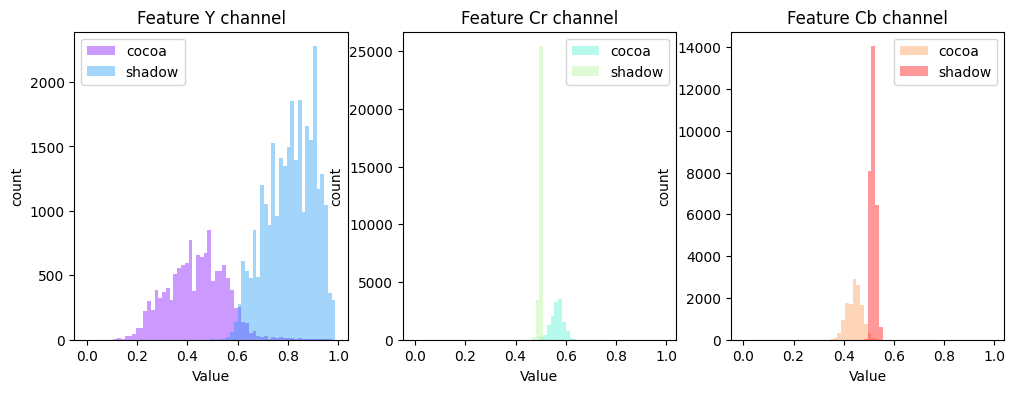

In [21]:
BS_model_ycrcb.plot_features_distribution(attr=['cocoa', 'shadow'])

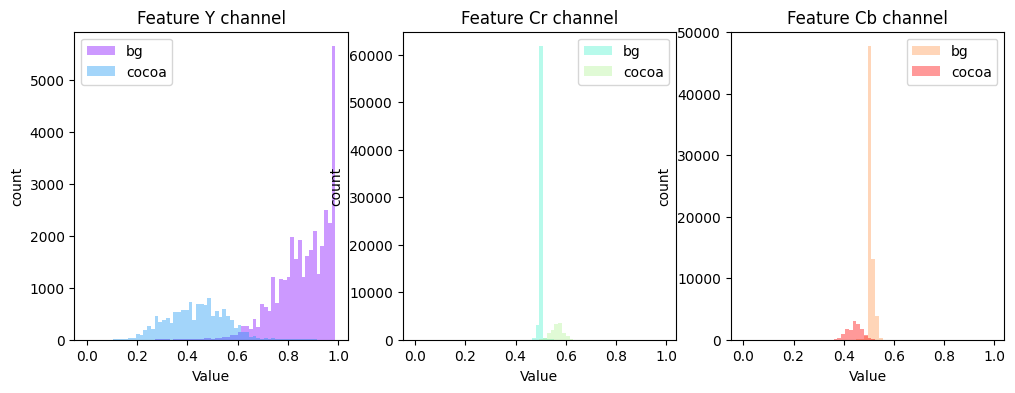

In [22]:
BS_model_ycrcb.plot_features_distribution(attr=['cocoa', 'bg'])

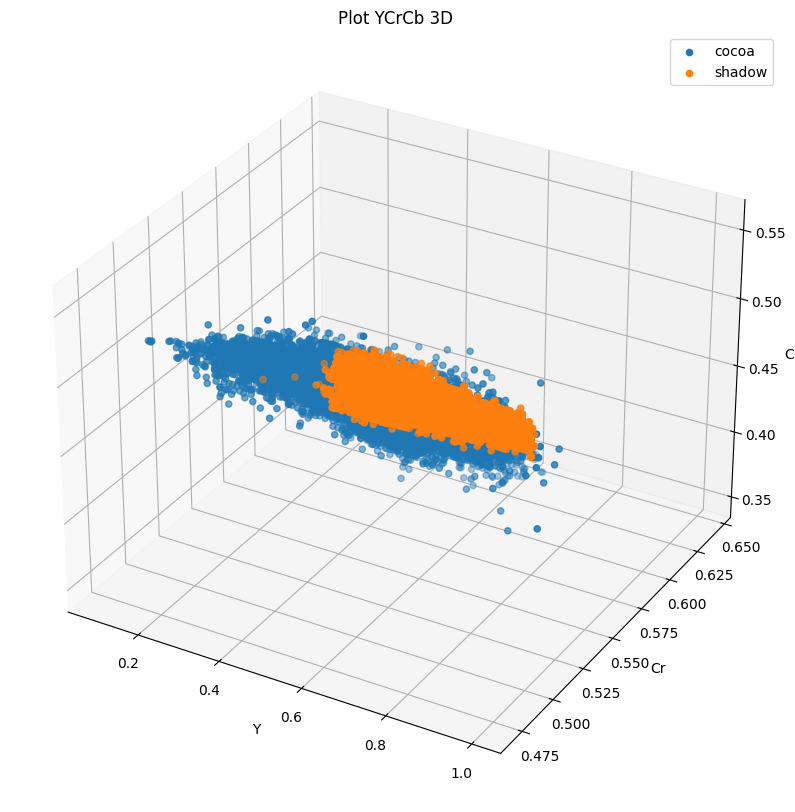

In [23]:
BS_model_ycrcb.plot_features_distribution(attr=['cocoa', 'shadow'], mode='3d', elev=0, azim=45, roll=0)

In [24]:
image_test = cv2.imread('../dataset/raw/21_cm_12_6_2.png')
test = np.zeros((image_test.shape[0], image_test.shape[1], 6))
test[:,:,:3] = image_test
test[:,:,3:] = image_test
print(test.shape)

(480, 640, 6)


Text(0.5, 1.0, 'Mask thres:0.8')

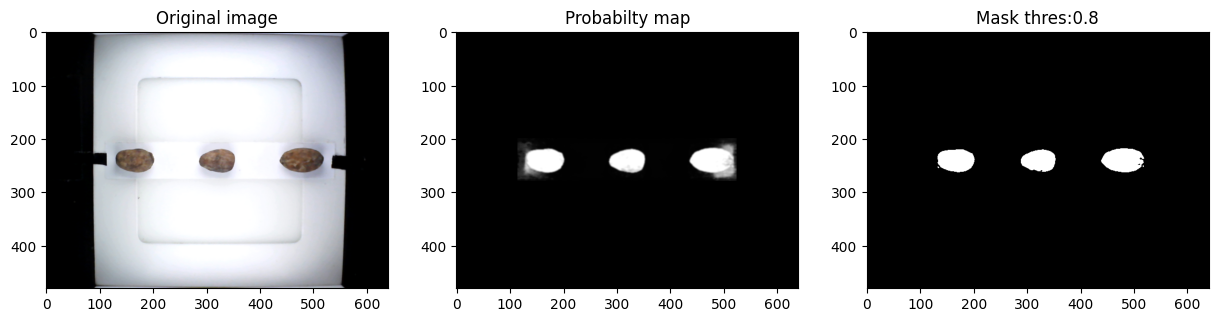

In [25]:
image_test = cv2.imread('../dataset/raw/21_cm_12_6_2.png')
image_test = cv2.cvtColor(image_test, cv2.COLOR_BGR2YCR_CB)

threshold = 0.8
mask, prob = BS_model_ycrcb.predict(image_test, [0.7, 0.15, 0.15], threshold=threshold, RoI=[200, 200, 115, 115], filter=True)

y,cr,cb = cv2.split(image_test)
image_rgb = cv2.cvtColor(image_test, cv2.COLOR_YCR_CB2RGB)

fig, ax = plt.subplots(1, 3, figsize=(3*5, 5))
ax[0].imshow(image_rgb)
ax[0].set_title('Original image')
ax[1].imshow(prob, cmap='gray')
ax[1].set_title('Probabilty map')
ax[2].imshow(mask, cmap='gray')
ax[2].set_title('Mask thres:{}'.format(threshold))

## BGR model

In [3]:
folder_path = r'C:\Users\natch\Github\Cocoa_Project\Basyesian_image'
os.chdir(folder_path)
annotation_file_path = '../dataset/annotation/annotation_test4.json'
raw_image_folder = '../dataset/raw/'
name_features = ['B', 'G', 'R', 'Y', 'Cr', 'Cb']

BS_model_rgb = bayesian_lib.Bayesian(n_features=6, name_features=name_features)
BS_model_rgb.fit(raw_image_folder, annotation_file_path, RoI=[310, 310, 144, 144], mode='combine')

Complete Fit data -------------
Detail
------------------------------------------------
Mode: combine
Number of images: 10
Number of Feature: 6 -> ['B', 'G', 'R', 'Y', 'Cr', 'Cb']
------------------------------------------------
Probability of Cocoa:		0.17100403225806454
Probability of Back ground:	0.8289959677419354
------------------------------------------------
Number of cocao sample:		170333
Number of background sample:	821667
Number of shadow sample:	0
Number of fit sample:		170333
------------------------------------------------
Model Background
	B 	mean: 0.3865926064319453 	std: 0.1438711653052618
	G 	mean: 0.38718332935611816 	std: 0.14538281380839466
	R 	mean: 0.37800214412759875 	std: 0.14045447367006264
	Y 	mean: 0.38482854173882913 	std: 0.14383928450868091
	Cr 	mean: 0.4968334575997213 	std: 0.005825069340105335
	Cb 	mean: 0.5028138077396952 	std: 0.003488059477839595
------------------------------------------------
Model Cocoa
	B 	mean: 0.1411739841093277 	std: 0.0429158

In [27]:
# BS_model_rgb.plot_features_distribution(attr=['cocoa', 'shadow'])

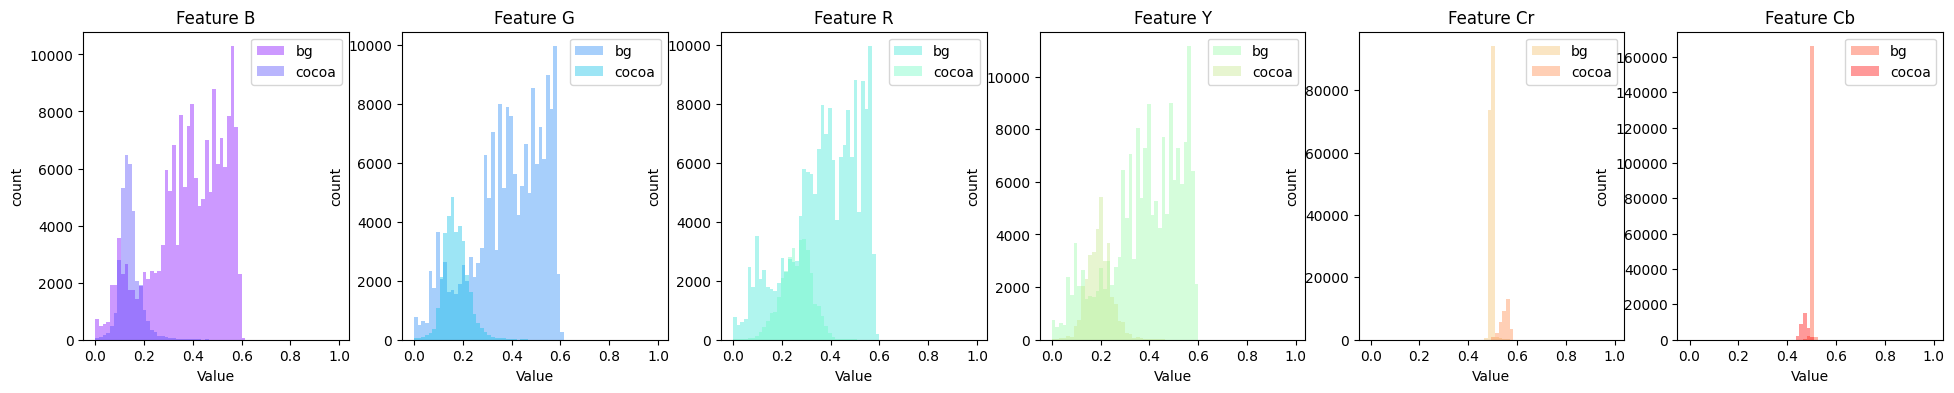

In [5]:
BS_model_rgb.plot_features_distribution(attr=['cocoa', 'bg'])

In [29]:
# BS_model_rgb.plot_features_distribution(attr=['cocoa', 'shadow'], mode='3d', elev=45, azim=-45, roll=0)

Text(0.5, 1.0, 'Cut')

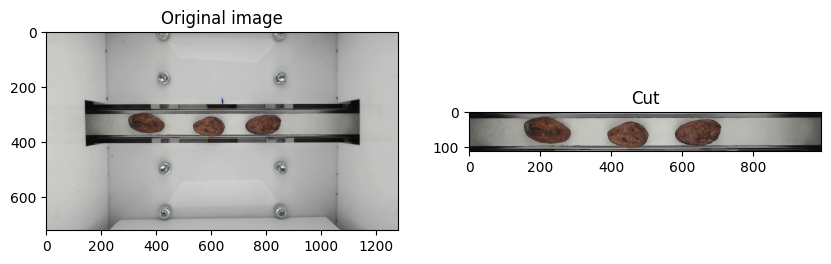

In [75]:
image_test = cv2.imread('../collect_03072023/data/l/l_1.png')
image_rgb = cv2.cvtColor(image_test, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 2, figsize=(2*5, 5))

ax[0].imshow(image_rgb)
ax[0].set_title('Original image')
ax[1].imshow(image_rgb[280:-330, 144:-144, :])
ax[1].set_title('Cut')

Text(0.5, 1.0, 'Mask thres:0.5')

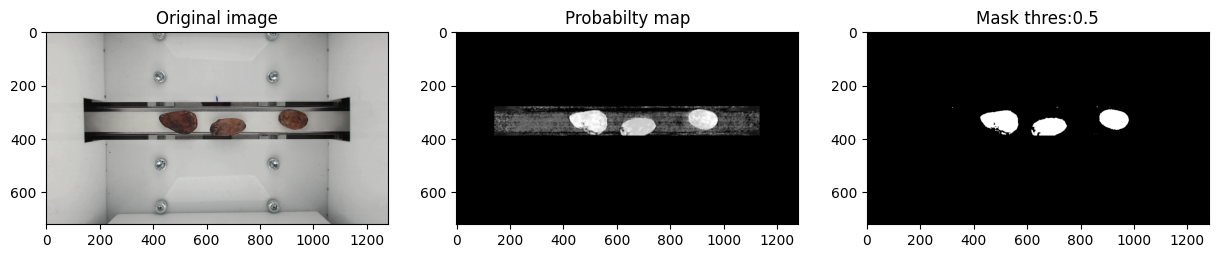

In [77]:
image_test = cv2.imread('../collect_03072023/data/l/l_23.png')
image_stack = np.zeros((image_test.shape[0], image_test.shape[1], 6))

image_stack[:,:,:3] = image_test
image_stack[:,:,3:6] = cv2.cvtColor(image_test, cv2.COLOR_BGR2YCR_CB)

threshold = 0.5
RoI=[280, 330, 144,144]
weight = [0.1, 0.1, 0, 0.2, 0.3, 0.3]

mask, prob = BS_model_rgb.predict(image_stack, weight, threshold=threshold, RoI=RoI, filter=True)

image_rgb = cv2.cvtColor(image_test, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 3, figsize=(3*5, 5))
ax[0].imshow(image_rgb)
ax[0].set_title('Original image')
ax[1].imshow(prob, cmap='gray')
ax[1].set_title('Probabilty map')
ax[2].imshow(mask, cmap='gray')
ax[2].set_title('Mask thres:{}'.format(threshold))

Text(0.5, 1.0, 'Apply')

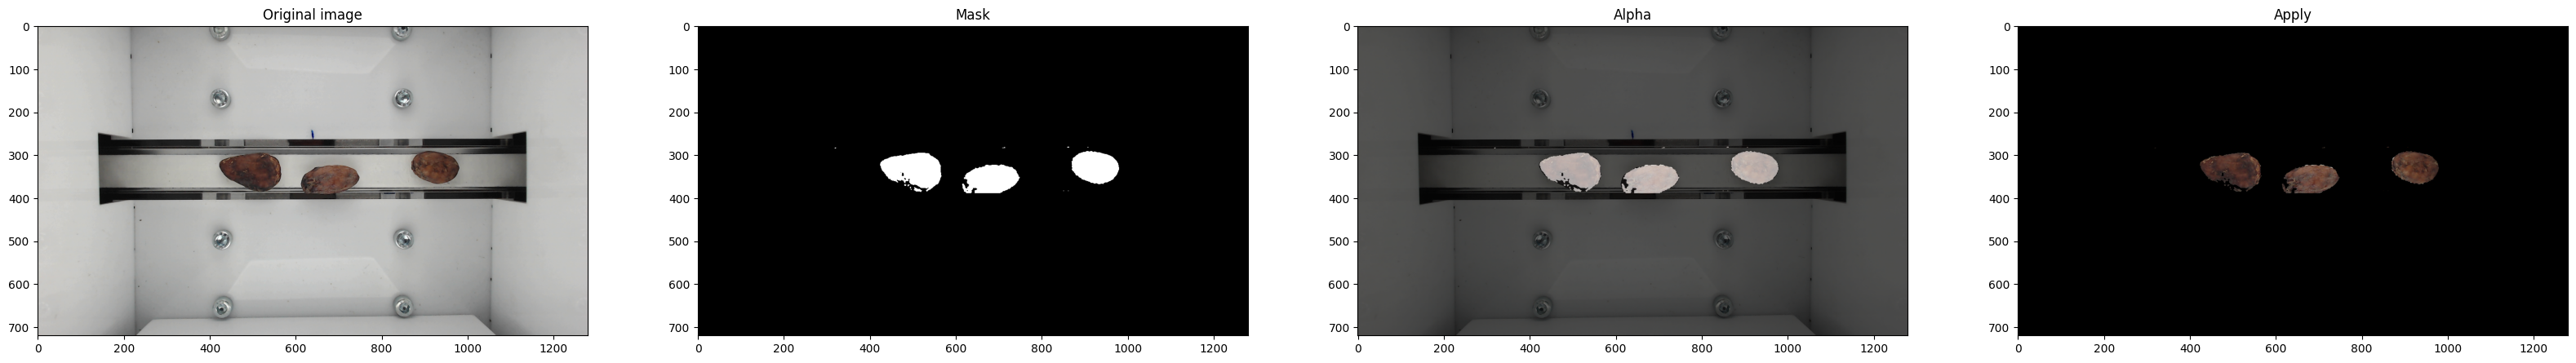

In [78]:
mask_reapeat = np.repeat((mask*255).astype(np.uint8), 3, axis=1).reshape(image_rgb.shape)
mask_apply = cv2.bitwise_and(image_rgb, mask_reapeat)
mask_alpha = cv2.addWeighted(mask_reapeat, 0.6 , image_rgb, 0.4, 0)

fig, ax = plt.subplots(1, 4, figsize=(4*10, 10))
ax[0].imshow(image_rgb)
ax[0].set_title('Original image')
ax[1].imshow(mask, cmap='gray')
ax[1].set_title('Mask')
ax[2].imshow(mask_alpha)
ax[2].set_title('Alpha')
ax[3].imshow(mask_apply)
ax[3].set_title('Apply')

In [ ]:
# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)

# # Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# # A StrMethodFormatter is used automatically
# ax.zaxis.set_major_formatter('{x:.02f}')

# # Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)

# plt.show()

# Separate beans and Analysis

In [22]:
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import time
import os

import bayesian_lib
import preprocessing_lib
import importlib
importlib.reload(bayesian_lib)
importlib.reload(preprocessing_lib)

%matplotlib inline

In [80]:
folder_path = r'C:\Users\natch\Github\Cocoa_Project\dataset\collect_03072023\data'
os.chdir(folder_path)
sub_folder = os.listdir(folder_path)
prep = preprocessing_lib.Prep_cocoa(500) #change kernel

collect = [[] for i in range(len(sub_folder))]
count_bean = [[] for i in range(len(sub_folder))]
collect_mask = [[] for i in range(len(sub_folder))]
collect_name = [[] for i in range(len(sub_folder))]

for i, f in enumerate(sub_folder):
    images = os.listdir(os.path.join(folder_path, f))

    for im in images:
        im_path = os.path.join(folder_path, f, im)
        image_test = cv2.imread(im_path)

        image_stack = np.zeros((image_test.shape[0], image_test.shape[1], 6))

        image_stack[:,:,:3] = image_test
        image_stack[:,:,3:6] = cv2.cvtColor(image_test, cv2.COLOR_BGR2YCR_CB)

        threshold = 0.6
        RoI=[280,320, 144,144]
        weight = [0.1, 0.1, 0, 0.2, 0.3, 0.3]

        mask, prob = BS_model_rgb.predict(image_stack, [0.05, 0.05, 0, 0.3, 0.3, 0.3], threshold=threshold, RoI=RoI, filter=True)

        image_rgb = cv2.cvtColor(image_test, cv2.COLOR_BGR2RGB)

        sep_mask = prep.crop(mask, RoI=RoI, Horizon=True)
        count_bean[i].append(sep_mask.shape[0])
        collect_mask[i].append(mask)
        collect_name[i].append(im)

        for b in sep_mask:
            collect[i].append(b)

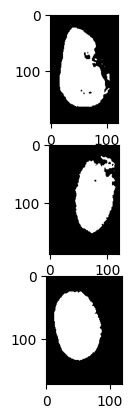

In [90]:
cl = 0
pic_set = 15
start_pic = np.sum(count_bean[cl][:pic_set])
stop_pic = start_pic + count_bean[cl][pic_set]

fig, ax = plt.subplots(count_bean[cl][pic_set], 1)
for i, b in enumerate(collect[cl][start_pic:stop_pic]):
    ax[i].imshow(b, cmap='gray')

plt.show()

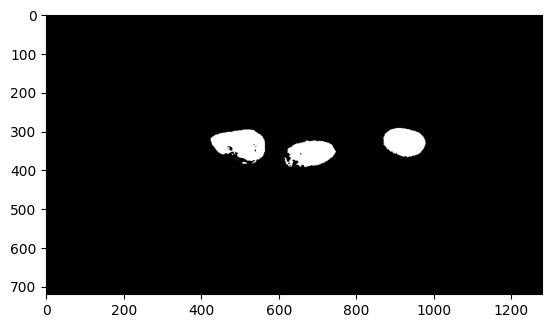

In [91]:
plt.imshow(collect_mask[cl][pic_set], cmap='gray')
plt.show()

In [92]:
collect_name[cl][pic_set]

'l_23.png'

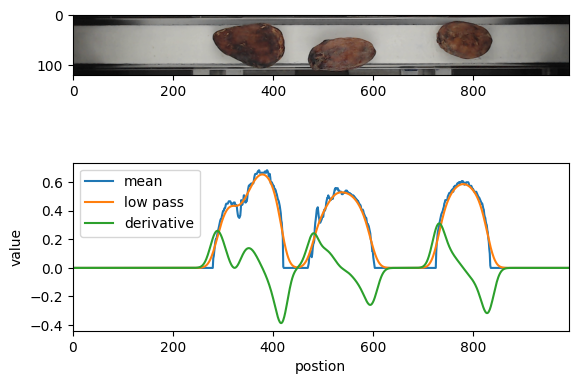

In [98]:
img_rgb = cv2.imread('../data/l/'+ collect_name[cl][pic_set])
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)
prep.plot(img_rgb, collect_mask[cl][pic_set], RoI=RoI, Rot=False)

## Analysis distribution
L / M / S / out

In [34]:
class_sum = [[] for i in range(len(collect_mask))]
for c in range(len(collect_mask)):
    class_sum[c] = [np.sum(m) for m in collect[c]]

collect_mean = [np.mean(np.array(e)) for e in class_sum]
collect_std = [np.std(np.array(e)) for e in class_sum]

In [35]:
print('size L: \tmean {:.2f} \tstd {:.2f} \tsamples {}'.format(collect_mean[0], collect_std[0], np.sum(count_bean[0])))
print('size M: \tmean {:.2f} \tstd {:.2f} \tsamples {}'.format(collect_mean[1], collect_std[1], np.sum(count_bean[1])))
print('size S: \tmean {:.2f} \tstd {:.2f} \tsamples {}'.format(collect_mean[2], collect_std[2], np.sum(count_bean[2])))
print('size Out: \tmean {:.2f} \tstd {:.2f} \tsamples {}'.format(collect_mean[3], collect_std[3], np.sum(count_bean[3])))

size L: 	mean 6165.08 	std 789.94 	samples 120
size M: 	mean 5412.65 	std 658.37 	samples 127
size S: 	mean 4333.87 	std 732.00 	samples 178
size Out: 	mean 5028.66 	std 469.61 	samples 107


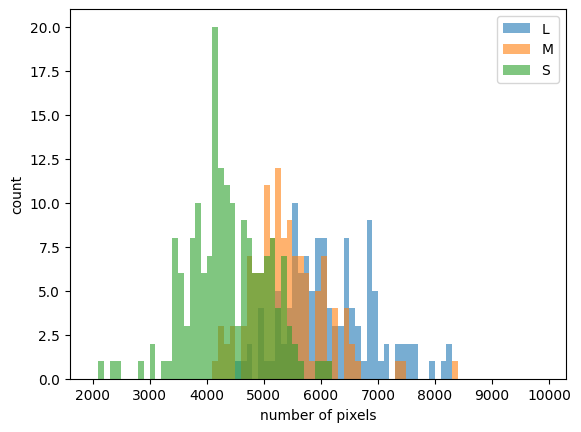

In [38]:
labels = ['L', 'M', 'S', 'out']
bins = np.arange(2000, 10000, 100)
for i in range(3):
    plt.hist(class_sum[i], alpha=0.6, label=labels[i], bins=bins)

plt.xlabel('number of pixels')
plt.ylabel('count')
plt.legend()

# Additional 

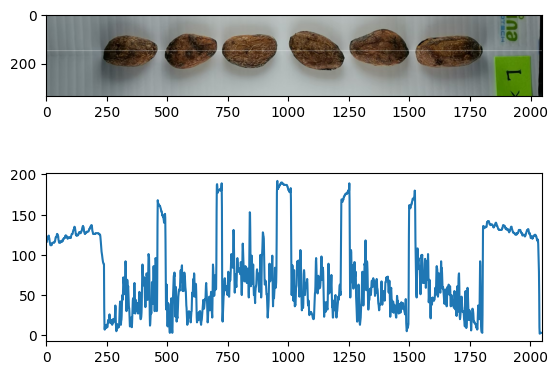

In [226]:
image_test = cv2.imread('../dataset/raw/LINE_ALBUM_Cocoa Beans separated by Weight Range - 2023-04-06_230607_10.jpg')
line = 750

image_ycbcr  = cv2.cvtColor(cv2.rotate(image_test, cv2.ROTATE_90_CLOCKWISE), cv2.COLOR_BGR2YCR_CB)
Y_ch = image_ycbcr[line, :, 0]

image_rgb = cv2.cvtColor(cv2.rotate(image_test, cv2.ROTATE_90_CLOCKWISE), cv2.COLOR_BGR2RGB)
image_rgb[line, :, :] = np.ones((image_rgb.shape[1], 3))*255
image_rgb = image_rgb[600:-600, :]

fig, ax = plt.subplots(2, 1)
ax[0].imshow(image_rgb)
ax[1].plot(Y_ch)
ax[1].set_xlim(xmin=0, xmax=image_rgb.shape[1])

plt.show()

# VDO

## Setup camera

In [ ]:
video = cv2.VideoCapture(1, cv2.CAP_DSHOW)

h = 720
w = 1280

video.set(cv2.CAP_PROP_FRAME_WIDTH, w)
video.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

bold = 1
length = 20
offset = 50

half_h = int(math.floor(h/2))
half_w = int(math.floor(w/2))

while(True):
    start_time = time.time()
    check, frame = video.read()
    #draw center reference
    frame[half_h-length+1:half_h+length, half_w-bold+1:half_w+bold,:] = (0,0,255) #vertical line
    frame[half_h-bold+1:half_h+bold, half_w-length+1:half_w+length,:] = (0,0,255) #horizontal line
    #draw conveyor line reference
    frame[half_h-bold+1-offset:half_h+bold-offset, :,:] = (0,0,255) #over horizontal line
    frame[half_h-bold+1+offset:half_h+bold+offset, :,:] = (0,0,255) #under horizontal line

    cv2.imshow("Setup", frame)

    if cv2.waitKey(30) & 0xFF == ord('q'):
        cv2.destroyWindow("Setup")
        break
     
video.release()

## Distrotion Fixing

In [46]:
h = 720
w = 1280

logi_camera = preprocessing_lib.Camera(1, w, h)

In [47]:
logi_camera.camera_calculate_intrinsic_param(10, 3, 20, save_file_path='./parameter/camera_calibration.yaml')

1
2
3
4
5
6
7
8
9
10
11
12
13
Sucessful Calculate Intrinsic Parameter


In [48]:
logi_camera.load_intrinsic_param('./parameter/camera_calibration.yaml')

In [50]:
logi_camera.Test()

## Capture image

In [3]:
video = cv2.VideoCapture(1, cv2.CAP_DSHOW)

h = 720
w = 1280

video.set(cv2.CAP_PROP_FRAME_WIDTH, w)
video.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

id = 17
save_directory = r"C:\Users\natch\Github\Cocoa_Project\dataset\collect_03072023\train\out"

while(True):
    start_time = time.time()
    check, frame = video.read()
    # gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    cv2.imshow("Capturing", frame)

    if cv2.waitKey(50) & 0xFF == ord('q'):
        cv2.destroyWindow("Capturing")
        break
    
    if cv2.waitKey(50) & 0xFF == ord('c'):
        file_name = os.path.join(save_directory, '{}{}{}'.format('out_', id, '.png'))
        print('Saved!!!', file_name)
        cv2.imwrite(file_name, frame)
        id += 1

video.release()

Saved!!! C:\Users\natch\Github\Cocoa_Project\dataset\collect_03072023\train\out\out_17.png
Saved!!! C:\Users\natch\Github\Cocoa_Project\dataset\collect_03072023\train\out\out_18.png
Saved!!! C:\Users\natch\Github\Cocoa_Project\dataset\collect_03072023\train\out\out_19.png
Saved!!! C:\Users\natch\Github\Cocoa_Project\dataset\collect_03072023\train\out\out_20.png
Saved!!! C:\Users\natch\Github\Cocoa_Project\dataset\collect_03072023\train\out\out_21.png
Saved!!! C:\Users\natch\Github\Cocoa_Project\dataset\collect_03072023\train\out\out_22.png
Saved!!! C:\Users\natch\Github\Cocoa_Project\dataset\collect_03072023\train\out\out_23.png
Saved!!! C:\Users\natch\Github\Cocoa_Project\dataset\collect_03072023\train\out\out_24.png
Saved!!! C:\Users\natch\Github\Cocoa_Project\dataset\collect_03072023\train\out\out_25.png
Saved!!! C:\Users\natch\Github\Cocoa_Project\dataset\collect_03072023\train\out\out_26.png
Saved!!! C:\Users\natch\Github\Cocoa_Project\dataset\collect_03072023\train\out\out_27.png

## Test Model on video

In [64]:
video = cv2.VideoCapture(2)
threshold = 0.7

while(True):
    start_time = time.time()

    check, frame = video.read()
    frame_y = cv2.cvtColor(frame, cv2.COLOR_BGR2YCR_CB)

    image_stack = np.zeros((frame_y.shape[0], frame_y.shape[1], 6))
    image_stack[:,:,:3] = frame
    image_stack[:,:,3:6] = frame_y
    
    mask, pred_image = BS_model_rgb.predict(image_stack, [0.3, 0.2, 0, 0.2, 0.15, 0.15], threshold=threshold, RoI=[200, 200,115, 115], filter=True)

    finish_time = time.time()

    print(finish_time-start_time)

    cv2.imshow("Capturing", pred_image)

    key = cv2.waitKey(1)
    if cv2.waitKey(1) & 0xFF == ord('s'):
        cv2.destroyWindow("Capturing")
        break
    
video.release()